In [1]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in data
NYT_US = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
NYT_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
NYT_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
JH_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

df = pd.read_csv(NYT_US, error_bad_lines=False)

In [3]:
df['time_since_Jan21'] = df.index
df.head(1000)

,date,cases,deaths,time_since_Jan21
0,2020-01-21,1,0,0
1,2020-01-22,1,0,1
2,2020-01-23,1,0,2
3,2020-01-24,2,0,3
4,2020-01-25,3,0,4
...,...,...,...,...
159,2020-06-28,2565015,125814,159
160,2020-06-29,2604915,126161,160
161,2020-06-30,2653280,127461,161
162,2020-07-01,2703212,128103,162


In [4]:
# ax = plt.gca()
# df.plot(kind='line',x='time_since_Jan21',y='cases',ax=ax,figsize=(8, 8))
# plt.title("Cases in the US")
# plt.xlabel('Date')
# plt.ylabel('Cases')
# plt.xticks(rotation=45)

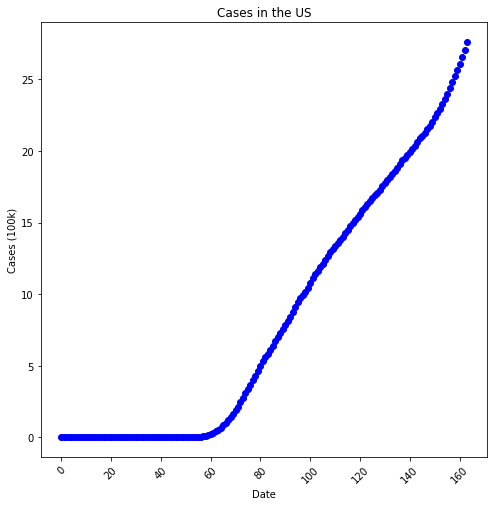

In [14]:
plt.figure(figsize=(8,8))
plt.title("Cases in the US")
plt.xlabel('Date')
plt.ylabel('Cases (100k)')
plt.xticks(rotation=45)
plt.scatter(df['time_since_Jan21'],df['cases']/100000,color='blue')
plt.show()

In [11]:
#creating the training and testing data sets 
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#we use PolynomialFeatures function in Scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#training x and y's
train_x = np.asanyarray(train[['time_since_Jan21']])
train_y = np.asanyarray(train[['cases']])

#testing x and y's
test_x = np.asanyarray(test[['time_since_Jan21']])
test_y = np.asanyarray(test[['cases']])

#We specifiy the degree
poly = PolynomialFeatures(degree=2)
#fit_transform takes our x values, and outputs a multi dim. array of each x^0, x^1, x^2
train_x_poly = poly.fit_transform(train_x) 
# train_x_poly

#Because now each list resembles a mulitple linear regression coeffecients, we use a linear regression!
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

##Let's plot it
plt.figure(figsize=(8,8))
plt.scatter(df['time_since_Jan21'],df['cases'],color='blue')
XX = np.arange(0.0, 180.0, 0.1) ##like linspace, it just creates a series of x coordinates
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel('Date')
plt.ylabel('Cases')